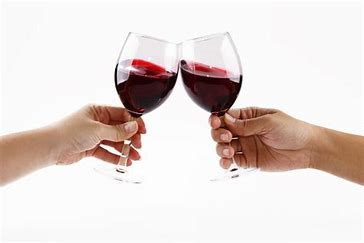

In [92]:
#Red, Red, Wine Group presentation on Wine Quality - CHEERS

from PIL import Image
image = Image.open('wine2.png')
image

In [1]:

# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
% matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#import the necessary modelling algos.

#classifiaction.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
 

#regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

#preprocessing
from sklearn.preprocessing import MinMaxScaler,StandardScaler,Imputer,LabelEncoder

#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # for classification

In [87]:
df=pd.read_csv('winequality-red.csv')
df.shape

(1599, 12)

In [101]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [13]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [14]:
df.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [110]:
data = df
n_wines = data.shape[0]

#number of wines with quality rating above 6
quality_above_6 = data.loc[(data['quality']>6)]
n_above_6 = quality_above_6.shape[0]

#number of wines with quality rating above 5
quality_below_5 = data.loc[(data['quality']>5)]
n_below_5 = quality_below_5.shape[0]

#number of wines with quality 5 to 6
quality_between_5 = data.loc[(data['quality']>=5) & (data['quality'] <=6)]
n_between_5 = quality_between_5.shape[0]

greater_percent = n_above_6*100/n_wines

print("total number of wine data: {}".format(n_wines))
print("total number with rating 7 and above: {}".format(n_above_6))
print("total number of wines with rating less than 5: {}".format(n_below_5))
print("total number of wines with rating 5 and 6: {}".format(n_between_5))
print("percentage of wines with quality 7 and above:{:2f}%".format(greater_percent))

display(np.round(data.describe()))


total number of wine data: 1599
total number with rating 7 and above: 217
total number of wines with rating less than 5: 855
total number of wines with rating 5 and 6: 1319
percentage of wines with quality 7 and above:13.570982%


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0,1599.0
mean,8.0,1.0,0.0,3.0,0.0,16.0,46.0,1.0,3.0,1.0,10.0,6.0
std,2.0,0.0,0.0,1.0,0.0,10.0,33.0,0.0,0.0,0.0,1.0,1.0
min,5.0,0.0,0.0,1.0,0.0,1.0,6.0,1.0,3.0,0.0,8.0,3.0
25%,7.0,0.0,0.0,2.0,0.0,7.0,22.0,1.0,3.0,1.0,10.0,5.0
50%,8.0,1.0,0.0,2.0,0.0,14.0,38.0,1.0,3.0,1.0,10.0,6.0
75%,9.0,1.0,0.0,3.0,0.0,21.0,62.0,1.0,3.0,1.0,11.0,6.0
max,16.0,2.0,1.0,16.0,1.0,72.0,289.0,1.0,4.0,2.0,15.0,8.0


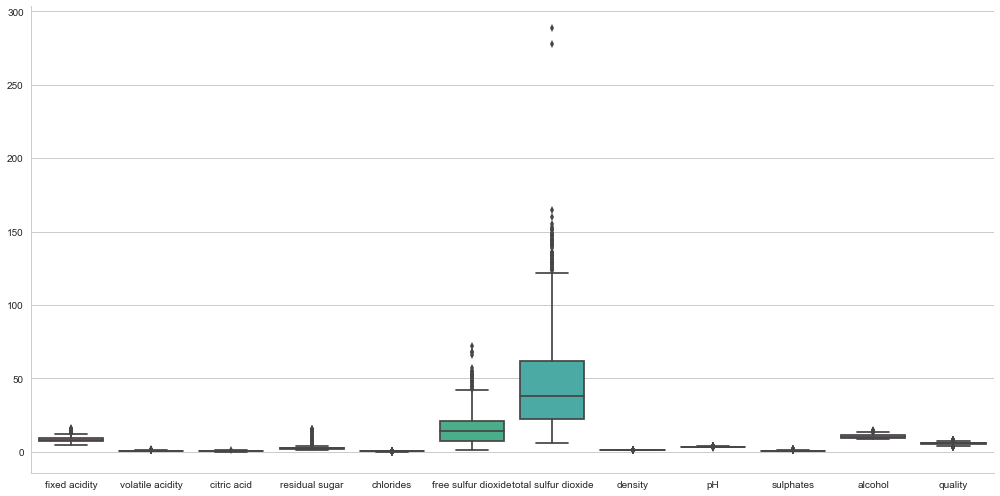

In [98]:
sns.factorplot(data=df,kind='box',size=7,aspect=2)

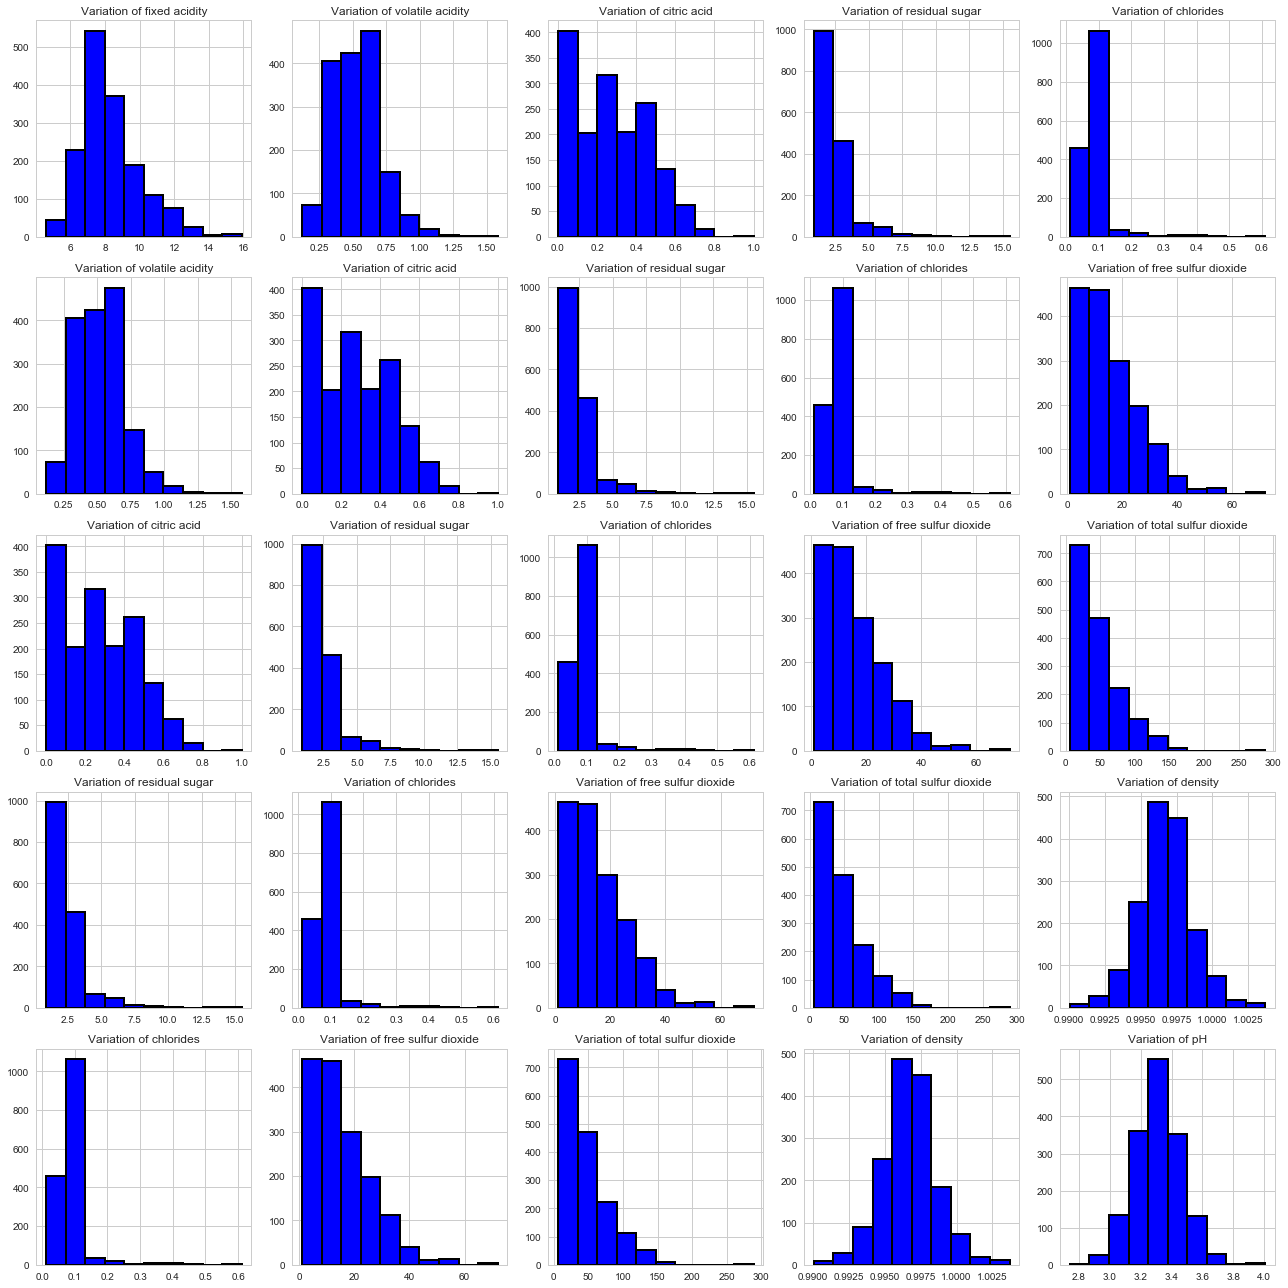

In [89]:
# using a histogram.
fig,axes=plt.subplots(5,5)
columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']
for i in range (5):
    for j in range (5):
        axes[i,j].hist(x=columns[i+j],data=df,edgecolor='#000000',linewidth=2,color='blue')
        axes[i,j].set_title('Variation of '+columns[i+j])
fig=plt.gcf()
fig.set_size_inches(18,18)
fig.tight_layout()

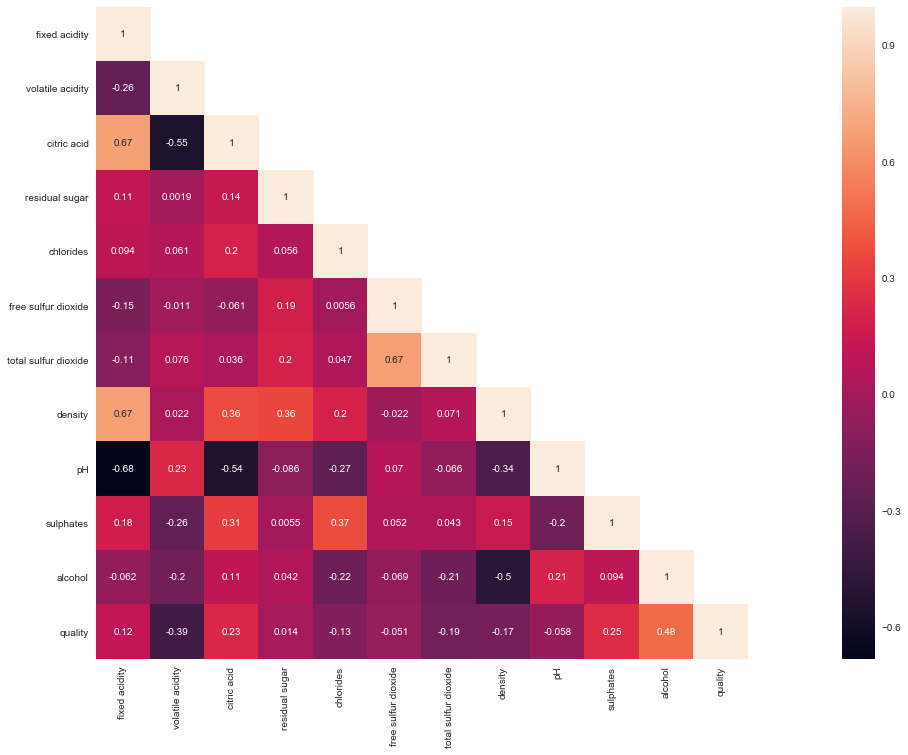

In [102]:
#corelation matrix.
cor_mat= df.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar="RdBu_r")

In [18]:

def plot(feature_x,target='quality'):
    sns.factorplot(x=target,y=feature_x,data=df,kind='bar',size=5,aspect=1)
    sns.factorplot(x=target,y=feature_x,data=df,kind='violin',size=5,aspect=1)
    sns.factorplot(x=target,y=feature_x,data=df,kind='swarm',size=5,aspect=1)

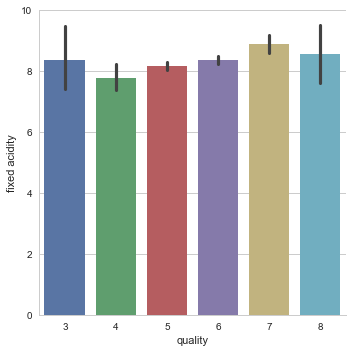

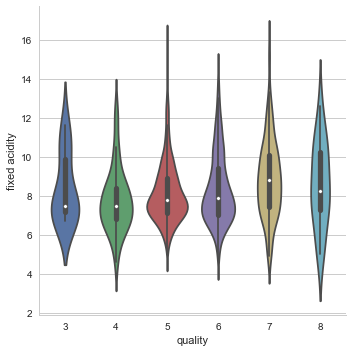

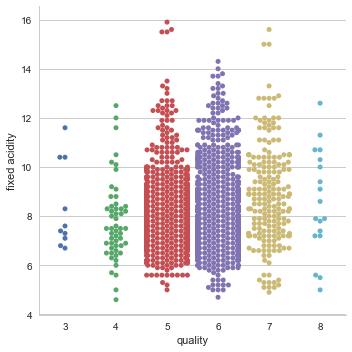

In [19]:
# for fixed acidity.
plot('fixed acidity','quality')

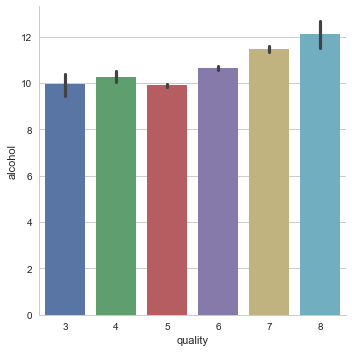

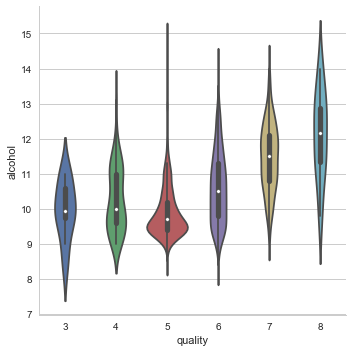

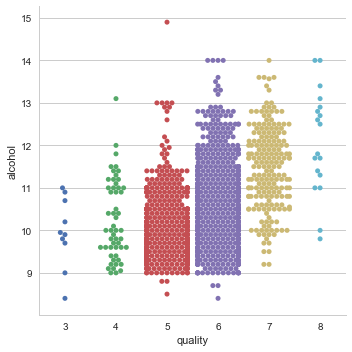

In [20]:
# for alcohol.
plot('alcohol','quality')

In [21]:

bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)

In [22]:
label_quality = LabelEncoder()

In [23]:
#Bad becomes 0 and good becomes 1 
df['quality'] = label_quality.fit_transform(df['quality'])

In [24]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('quality',axis=1),df['quality'],test_size=0.25,random_state=42)

In [25]:
models=[LogisticRegression(),LinearSVC(),SVC(kernel='rbf'),KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GradientBoostingClassifier(),GaussianNB()]
model_names=['LogisticRegression','LinearSVM','rbfSVM','KNearestNeighbors','RandomForestClassifier','DecisionTree',
             'GradientBoostingClassifier','GaussianNB']

acc=[]
d={}

for model in range(len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    pred=clf.predict(x_test)
    acc.append(accuracy_score(pred,y_test))
     
d={'Modelling Algo':model_names,'Accuracy':acc}
d

{'Modelling Algo': ['LogisticRegression',
  'LinearSVM',
  'rbfSVM',
  'KNearestNeighbors',
  'RandomForestClassifier',
  'DecisionTree',
  'GradientBoostingClassifier',
  'GaussianNB'],
 'Accuracy': [0.8775, 0.79, 0.8725, 0.8625, 0.905, 0.8925, 0.875, 0.8525]}

In [26]:
acc_frame=pd.DataFrame(d)
acc_frame

,Modelling Algo,Accuracy
0,LogisticRegression,0.8775
1,LinearSVM,0.7900
2,rbfSVM,0.8725
3,KNearestNeighbors,0.8625
4,RandomForestClassifier,0.9050
5,DecisionTree,0.8925
6,GradientBoostingClassifier,0.8750
7,GaussianNB,0.8525


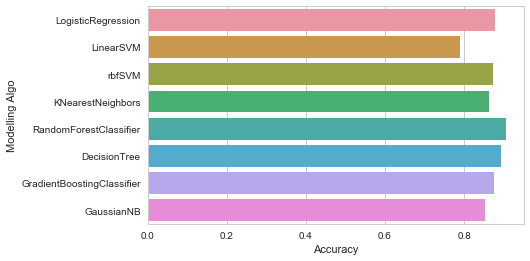

In [27]:
sns.barplot(y='Modelling Algo',x='Accuracy',data=acc_frame)

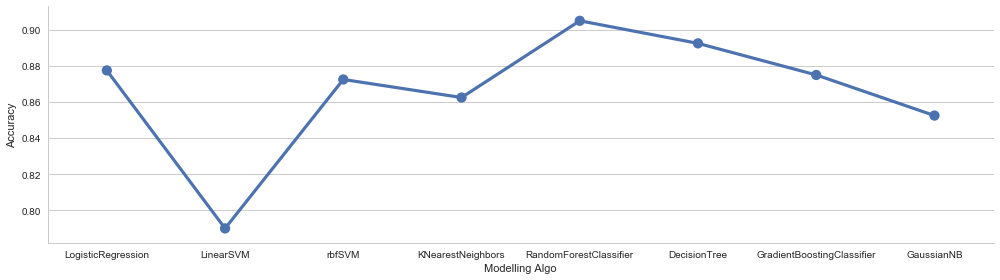

In [33]:
sns.factorplot(x='Modelling Algo',y='Accuracy',data=acc_frame,kind='point',size=4,aspect=3.5)


In [34]:
def func(x_train,x_test,y_train,y_test,name_scaler):
    models=[LogisticRegression(),LinearSVC(),SVC(kernel='rbf'),KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GradientBoostingClassifier(),GaussianNB()]
    acc_sc=[]
    for model in range(len(models)):
        clf=models[model]
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        acc_sc.append(accuracy_score(pred,y_test))
     
    acc_frame[name_scaler]=np.array(acc_sc)

In [35]:
scalers=[MinMaxScaler(),StandardScaler()]
names=['Acc_Min_Max_Scaler','Acc_Standard_Scaler']
for scale in range(len(scalers)):
    scaler=scalers[scale]
    scaler.fit(df)
    scaled_df=scaler.transform(df)
    X=scaled_df[:,0:11]
    Y=df['quality'].as_matrix()
    x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)
    func(x_train,x_test,y_train,y_test,names[scale])

In [36]:
acc_frame

,Modelling Algo,Accuracy,Acc_Min_Max_Scaler,Acc_Standard_Scaler
0,LogisticRegression,0.8775,0.8750,0.8775
1,LinearSVM,0.7900,0.8825,0.8825
2,rbfSVM,0.8725,0.8675,0.8900
3,KNearestNeighbors,0.8625,0.8850,0.8950
4,RandomForestClassifier,0.9050,0.8900,0.8950
5,DecisionTree,0.8925,0.8950,0.8875
6,GradientBoostingClassifier,0.8750,0.8775,0.8750
7,GaussianNB,0.8525,0.8425,0.8425


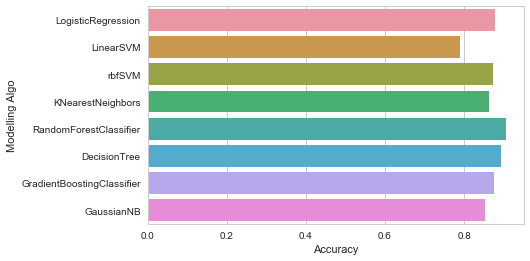

In [37]:

# just to visualize the accuracies.
sns.barplot(y='Modelling Algo',x='Accuracy',data=acc_frame)

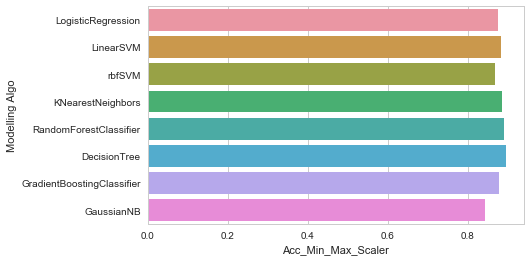

In [38]:
sns.barplot(y='Modelling Algo',x='Acc_Min_Max_Scaler',data=acc_frame)


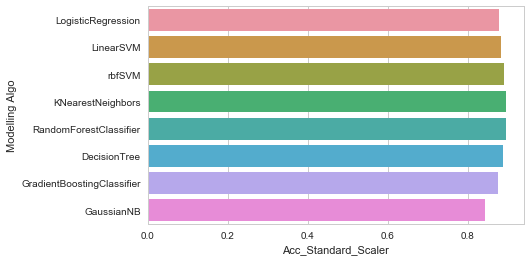

In [39]:
sns.barplot(y='Modelling Algo',x='Acc_Standard_Scaler',data=acc_frame)


In [40]:

# preparing the features by using a StandardScaler as it gave better resluts.
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df)
X=scaled_df[:,0:11]
Y=df['quality'].as_matrix()
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [41]:
params_dict={'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1','l2']}
clf_lr=GridSearchCV(estimator=LogisticRegression(),param_grid=params_dict,scoring='accuracy',cv=10)
clf_lr.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [42]:
clf_lr.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [43]:
clf_lr.best_score_ # the best accuracy obtained by Grid search on the train set.


0.8824020016680567

In [44]:
clf_lr.grid_scores_


C:\Users\w_hib\Anaconda3\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.86322, std: 0.00307, params: {'C': 0.001, 'penalty': 'l1'},
 mean: 0.88157, std: 0.02363, params: {'C': 0.001, 'penalty': 'l2'},
 mean: 0.86322, std: 0.00307, params: {'C': 0.01, 'penalty': 'l1'},
 mean: 0.88157, std: 0.01747, params: {'C': 0.01, 'penalty': 'l2'},
 mean: 0.87656, std: 0.01404, params: {'C': 0.1, 'penalty': 'l1'},
 mean: 0.88240, std: 0.01753, params: {'C': 0.1, 'penalty': 'l2'},
 mean: 0.87573, std: 0.01364, params: {'C': 1, 'penalty': 'l1'},
 mean: 0.87740, std: 0.01493, params: {'C': 1, 'penalty': 'l2'},
 mean: 0.87740, std: 0.01493, params: {'C': 10, 'penalty': 'l1'},
 mean: 0.87740, std: 0.01493, params: {'C': 10, 'penalty': 'l2'},
 mean: 0.87740, std: 0.01493, params: {'C': 100, 'penalty': 'l1'},
 mean: 0.87740, std: 0.01493, params: {'C': 100, 'penalty': 'l2'},
 mean: 0.87740, std: 0.01493, params: {'C': 1000, 'penalty': 'l1'},
 mean: 0.87740, std: 0.01493, params: {'C': 1000, 'penalty': 'l2'}]

In [45]:
pred=clf_lr.predict(x_test)
accuracy_score(pred,y_test)

0.88

In [50]:
l=[i+1 for i in range(50)]
params_dict={'n_neighbors':l,'n_jobs':[-1]}
clf_knn=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=params_dict,scoring='accuracy',cv=10)
clf_knn.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [51]:
clf_knn.best_score_


0.8807339449541285

In [52]:
clf_knn.best_params_


{'n_jobs': -1, 'n_neighbors': 1}

In [53]:
clf_knn.grid_scores_


C:\Users\w_hib\Anaconda3\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.88073, std: 0.02249, params: {'n_jobs': -1, 'n_neighbors': 1},
 mean: 0.87406, std: 0.02323, params: {'n_jobs': -1, 'n_neighbors': 2},
 mean: 0.86656, std: 0.02874, params: {'n_jobs': -1, 'n_neighbors': 3},
 mean: 0.87823, std: 0.02284, params: {'n_jobs': -1, 'n_neighbors': 4},
 mean: 0.86739, std: 0.02117, params: {'n_jobs': -1, 'n_neighbors': 5},
 mean: 0.86489, std: 0.01983, params: {'n_jobs': -1, 'n_neighbors': 6},
 mean: 0.86239, std: 0.02228, params: {'n_jobs': -1, 'n_neighbors': 7},
 mean: 0.86739, std: 0.02402, params: {'n_jobs': -1, 'n_neighbors': 8},
 mean: 0.86155, std: 0.01907, params: {'n_jobs': -1, 'n_neighbors': 9},
 mean: 0.86822, std: 0.01726, params: {'n_jobs': -1, 'n_neighbors': 10},
 mean: 0.86572, std: 0.02310, params: {'n_jobs': -1, 'n_neighbors': 11},
 mean: 0.86989, std: 0.02004, params: {'n_jobs': -1, 'n_neighbors': 12},
 mean: 0.86906, std: 0.01720, params: {'n_jobs': -1, 'n_neighbors': 13},
 mean: 0.86739, std: 0.01674, params: {'n_jobs': -1, 'n_neig

In [54]:
pred=clf_knn.predict(x_test)
accuracy_score(pred,y_test)   # actual accuarcy on our test set.

0.89

In [55]:
params_dict={'C':[0.001,0.01,0.1,1,10,100],'gamma':[0.001,0.01,0.1,1,10,100],'kernel':['linear','rbf']}
clf=GridSearchCV(estimator=SVC(),param_grid=params_dict,scoring='accuracy',cv=10)
clf.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [56]:
clf.best_score_


0.8999165971643036

In [57]:
clf.best_params_


{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [58]:

# now tuning finally around these values of C and gamma and the kernel for further increasing the accuracy.
params_dict={'C':[0.90,0.92,0.96,0.98,1.0,1.2,1.5],'gamma':[0.90,0.92,0.96,0.98,1.0,1.2,1.5],'kernel':['linear','rbf']}
clf_svm=GridSearchCV(estimator=SVC(),param_grid=params_dict,scoring='accuracy',cv=10)
clf_svm.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.9, 0.92, 0.96, 0.98, 1.0, 1.2, 1.5], 'gamma': [0.9, 0.92, 0.96, 0.98, 1.0, 1.2, 1.5], 'kernel': ['linear', 'rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [59]:
clf_svm.best_score_


0.9065888240200167

In [60]:
clf_svm.best_params_


{'C': 1.5, 'gamma': 0.9, 'kernel': 'rbf'}

In [61]:
clf_svm.grid_scores_


C:\Users\w_hib\Anaconda3\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.86322, std: 0.00307, params: {'C': 0.9, 'gamma': 0.9, 'kernel': 'linear'},
 mean: 0.89825, std: 0.01752, params: {'C': 0.9, 'gamma': 0.9, 'kernel': 'rbf'},
 mean: 0.86322, std: 0.00307, params: {'C': 0.9, 'gamma': 0.92, 'kernel': 'linear'},
 mean: 0.89825, std: 0.01752, params: {'C': 0.9, 'gamma': 0.92, 'kernel': 'rbf'},
 mean: 0.86322, std: 0.00307, params: {'C': 0.9, 'gamma': 0.96, 'kernel': 'linear'},
 mean: 0.89658, std: 0.01684, params: {'C': 0.9, 'gamma': 0.96, 'kernel': 'rbf'},
 mean: 0.86322, std: 0.00307, params: {'C': 0.9, 'gamma': 0.98, 'kernel': 'linear'},
 mean: 0.89825, std: 0.01623, params: {'C': 0.9, 'gamma': 0.98, 'kernel': 'rbf'},
 mean: 0.86322, std: 0.00307, params: {'C': 0.9, 'gamma': 1.0, 'kernel': 'linear'},
 mean: 0.89741, std: 0.01587, params: {'C': 0.9, 'gamma': 1.0, 'kernel': 'rbf'},
 mean: 0.86322, std: 0.00307, params: {'C': 0.9, 'gamma': 1.2, 'kernel': 'linear'},
 mean: 0.89491, std: 0.01848, params: {'C': 0.9, 'gamma': 1.2, 'kernel': 'rbf'},
 mea

In [62]:
pred=clf_svm.predict(x_test)
accuracy_score(pred,y_test)   # actual accuarcy on our test set.

0.9175

In [63]:
params_dict={'n_estimators':[500],'max_features':['auto','sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1),param_grid=params_dict,scoring='accuracy',cv=10)
clf_rf.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [500], 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [64]:

clf_rf.best_score_

0.9115929941618015

In [65]:

clf_rf.best_params_

{'max_features': 'auto', 'n_estimators': 500}

In [66]:
clf_rf.grid_scores_

C:\Users\w_hib\Anaconda3\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.91159, std: 0.02409, params: {'max_features': 'auto', 'n_estimators': 500},
 mean: 0.90659, std: 0.02220, params: {'max_features': 'sqrt', 'n_estimators': 500},
 mean: 0.90992, std: 0.02277, params: {'max_features': 'log2', 'n_estimators': 500}]

In [67]:

pred=clf_rf.predict(x_test)
accuracy_score(pred,y_test)   # actual accuarcy on our test set.

0.905

In [68]:
clf_gb=GridSearchCV(estimator=GradientBoostingClassifier(),cv=10,param_grid=dict({'n_estimators':[500]}))
clf_gb.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [500]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [69]:
clf_gb.best_score_

0.9115929941618015

In [70]:
clf_gb.best_params_

{'n_estimators': 500}

In [71]:
pred=clf_gb.predict(x_test)
accuracy_score(pred,y_test)

0.8875

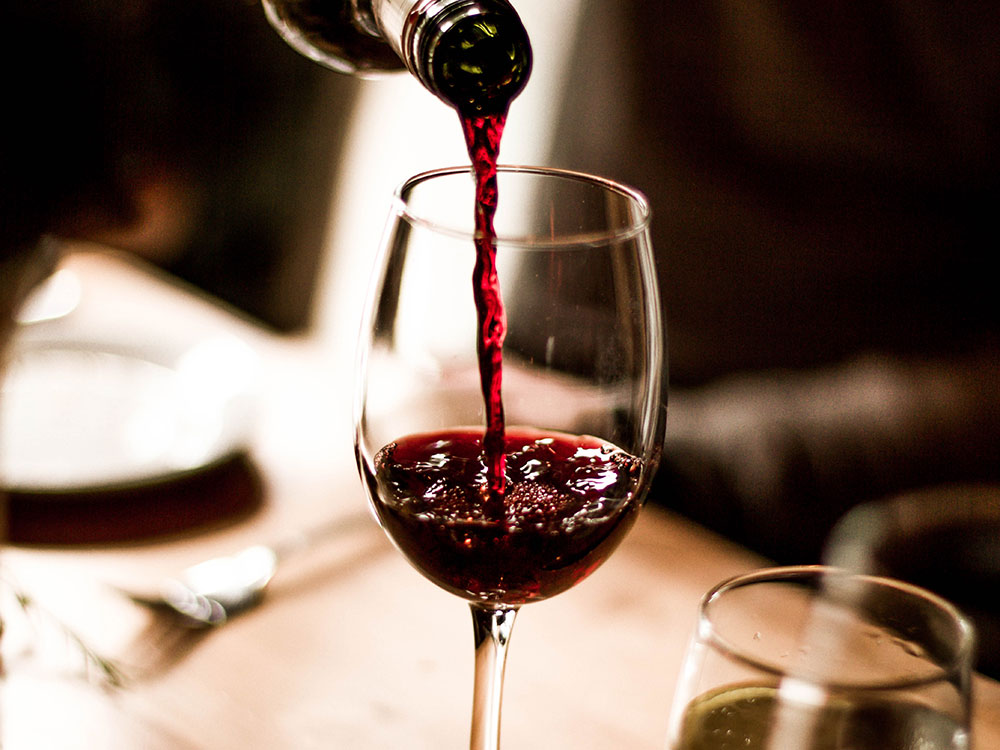

In [86]:
from PIL import Image
image = Image.open('wine.jpg')
image
